# Aula 8
### Visualização de dados


## 1) Importando o matplotlib e definindo parâmetros

In [2]:
# importando o matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# importando outras bibliotecas
import pandas as pd
import numpy as np

import yfinance as yf
import collections as col

from datetime import datetime 

from meteostat import Stations
from meteostat import Stations, Daily
from meteostat import Stations, Monthly 

In [4]:
# definindo o tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (4, 2)
# definindo uma formatação padrão das figuras
plt.rcParams['figure.constrained_layout.use'] = True

# aumentando a definição das imagens
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

O melhor lugar para começar é esse:
https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

Para entender melhor o funcionamento da biblioteca, é preciso entender como funcionam as figuras nela:

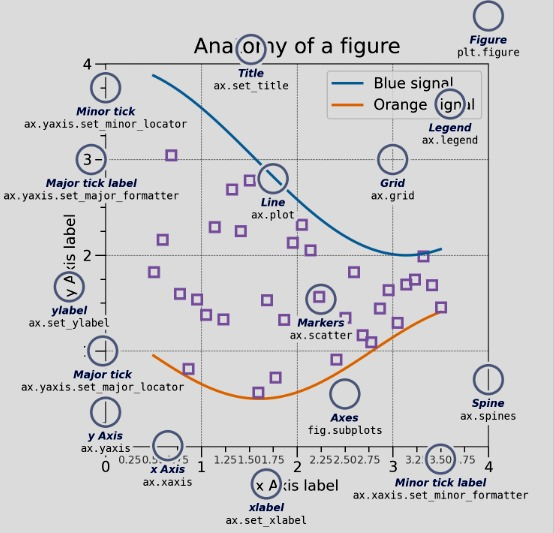

Cada uma dessas partes é uma função, com seus próprios argumentos. É mudando esses argumentos que você constrói e personaliza seu gráfico!

## 2) Criando figuras

Existem duas formas de criar figuras, a __explícita__ e a __implícita__

### 2.1) Forma explícita
Na forma explícita, se criam primeiro os objetos usados na figura - a própria figura e os eixos/gráficos, seguindo o seguinte formato:

fig, ax = plt.subplots()

In [5]:
fig = plt.figure() # fig cria a figura, mas sem eixos, então seria uma tela em branco

<Figure size 400x200 with 0 Axes>

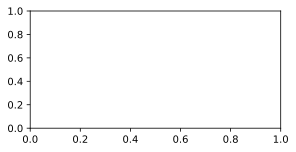

In [6]:
fig, ax = plt.subplots()

##### A partir disso, você edita a figura e os eixos com as funções:

ax .xaxis()  
ax .set_xlabel()     
ax .set_title()      

E plota o gráfico:

ax.plot(x, y, ...)

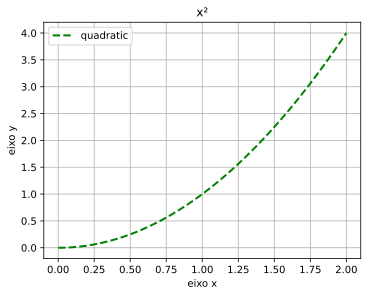

In [38]:
x = np.linspace(0, 2, 100) # "dados" = função linear

fig, ax = plt.subplots(1,1, figsize=(5, 4))

# editando a figura e os eixos
ax.grid() 
ax.set_xlabel("eixo x")
ax.set_ylabel("eixo y")
ax.set_title("x²")

# adicionando o plot
ax.plot(x, x**2, 
        color='green', label='quadratic', linestyle='--', linewidth=2) # argumentos mudando o design do gráfico
ax.legend() # necessário para aparecer a legenda - colocar depois do plot


### 2.2) Forma implícita
Na forma implícita, usa-se diretamente a função plot com os dados:

plt.figure()    
plt.plot(data)

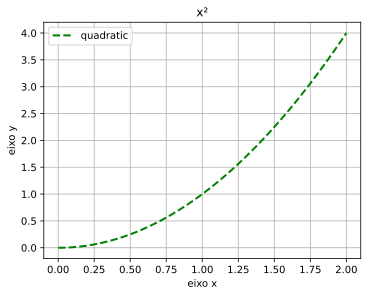

In [8]:
x = np.linspace(0, 2, 100) # "dados" = função linear

plt.figure(figsize=(5, 4))

# editando a figura e os eixos
plt.grid() 
plt.xlabel("eixo x")
plt.ylabel("eixo y")
plt.title("x²")

# adicionando o plot
plt.plot(x, x**2, 
        color='green', label='quadratic', linestyle='dashed', linewidth=2) # argumentos mudando o design do gráfico
plt.legend() # necessário para aparecer a legenda - colocar depois do plot

Um ponto muito importante, ainda, é que ao usar **_plt._, as funções, apesar de muito parecidas em maioria, são diferentes de _fig._ e _ax._!** Fique atento à essas diferenças, pois podem mudar a forma como você edita o gráfico. 

A forma implícita é a usual para um único gráfico na figura, portanto, mais simples e intuitiva em alguns casos.    
A forma explícita é mais útil ao fazer _mais de um_ eixo ou _mais de um_ gráfico na mesma figura;

Pra não perder o fio, vou mostrar agora como fazer mais de um plot na mesma figura

In [9]:
### Dados ibov e clima

# Dados mensais do clima na estação de Congonhas
clima = Monthly('83780', datetime(2012, 1, 1), datetime(2022, 12, 31))
clima = clima.fetch()

# Dados mensais do Ibovespa
data_ibov = yf.download('^BVSP', start=datetime(2012, 1, 1), end=datetime(2022, 12, 31), interval='1mo')
ibov = pd.DataFrame(data_ibov)

[*********************100%***********************]  1 of 1 completed


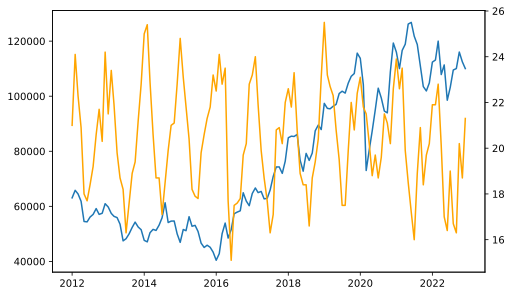

In [10]:
fig, ax1 = plt.subplots(figsize=(7,4))

ax2 = ax1.twinx() # Dois eixos no mesmo gráfico

ax1.plot(ibov['Adj Close'])
ax2.plot(clima['tavg'], color='orange')

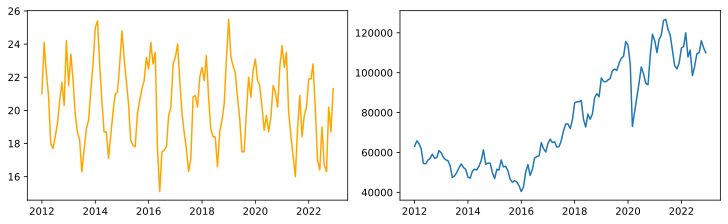

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3)) # linhas e colunas

axs[1].plot(ibov['Adj Close'])
axs[0].plot(clima['tavg'], color='orange')

Mas é possível fazer múltiplos plots de forma implícita? Sim! Mas é mais complicado, veja:

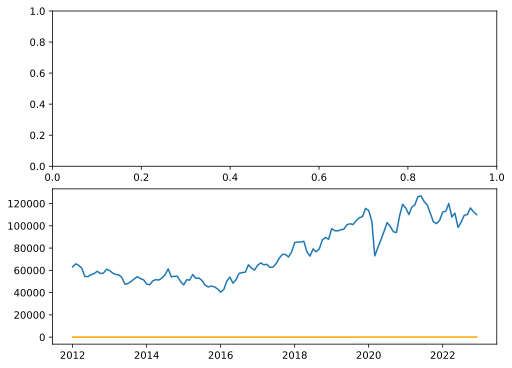

In [41]:
# forma implícita
plt.subplots(2,1, figsize=(7,5))
plt.plot(ibov['Adj Close'])
plt.plot(clima['tavg'], color='orange')
# ops!

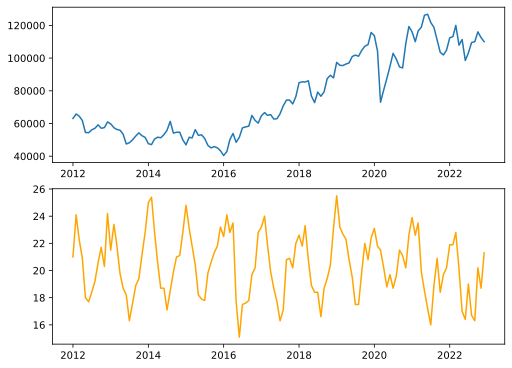

In [44]:
plt.figure(1, figsize=(7,5))

plt.subplot(2,1,1) # código de 3 caracteres para identificar cada plot
plt.plot(ibov['Adj Close'])

plt.subplot(2,1,2)
plt.plot(clima['tavg'], color='orange')

Muito código e pouco intuitivo!

### 2.3) Um segredinho

Outra forma de plotar gráficos e similar à implícita, é a função do pandas **.plot()**, que usa matplotlib. Um atalho muito útil para plotar gráficos rapidamente. A forma é:

__pandas.DataFrame.plot()__

Veja mais em: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [14]:
# exemplo:

# Usando o yf para coletar os dados do índice Ibovespa
data_b3 = yf.download('^BVSP', start=datetime(2022, 1, 1), end=datetime(2022, 12, 31))
b3 = pd.DataFrame(data_b3)
b3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200
...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100


<AxesSubplot: xlabel='Date'>

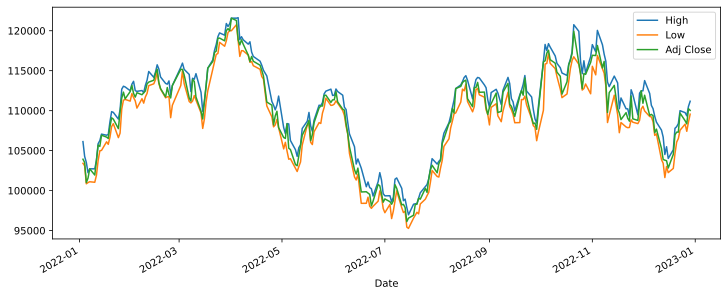

In [15]:
# Plotando os valores de máxima, mínima e de fechamendo ajustado por dia no mesmo ano:

b3.plot(y=['High', 'Low', 'Adj Close'], figsize=(10, 4))

Vamos usar a convenção implícita e explícita conforme necessidade ou facilidade

### 2.4) Algumas outras funcionalidades

- Você pode usar _plt.savefig()_ para salvar a imagem das figuras

- Você pode editar quase completamente os padrões iniciais de figuras usando o _plt.rcParams[]_

- É possível usar _loops_ para editar mais de um gráfico ao mesmo tempo

Antes de contruir mais gráficos, vamos falar um pouquinho de personalização....

## 3) Personalização

O que faz um gráfico ser bom ou bonito? Existem gráficos melhores que outros?
Uma parte significativa da personalização de um gráfico é subjetivo, como sua estética, mas há alguns princípios que podem ser seguidos.

Reflita: qual o _objetivo_ de um gráfico?

##### __1o princípio__: Mostre os dados   
O gráfico não é apenas os dados, mas também não é apenas um desenho. Os dados devem estar sempre à mostra.

##### __2o princípio__: Foco. Reduza a poluição visual     
Se a ideia de usar um gráfico é reduzir a informação que uma planilha ou tabela dá, não adianta só trocar os números por desenhos. Escolha os dados mais importantes e utilize representações visuais que dão destaque à eles.

##### __3o princípio__: Integrar o texto e o gráfico    
Não faz sentido ter um gráfico pra simplificar e melhorar a interpretação de certos dados e ter um monte de texto explicando junto. Polui a informação central e a torna redundante.


Importante: esses princípios são do artigo _"An Economist’s Guide to Visualizing Data"_, de Jonathan A. Schwabish, disponível no seguinte link: https://pubs.aeaweb.org/doi/pdf/10.1257/jep.28.1.209. Vale a pena a leitura. Abra pra ver alguns exemplos que colocam os princípios em prática.

## 4) Tipos de plots

Até agora, vimos apenas a função __plot()__, que em geral faz gráficos de linha. Mas e os outros tipos de gráficos?

O matplotlib tem uma função para cada um deles (que você pode ver com mais detalhes aqui: https://matplotlib.org/stable/plot_types/index.html)

Os principais gráficos são:

|Tipo       |Função              |
| ---------- | ------------------ |
|Linha       | plot(x)  |
|Dispersão:  | scatter(x,y)     |
|Barra:      | bar(x, height)  | 
|Histograma: | hist(x)         |
|Boxplot:    | boxplot(x)      |  
|Pizza:      | pie(x)          |

### 4.1) Gráfico de dispersão - scatterplot

In [16]:
# coletando dados do spotify

data_spotify = pd.read_csv(r"C:\VS\USP\fea_dev\post\aula_visu_dados\playlist_2010to2022.csv")
spotify = pd.DataFrame(data_spotify)
spotify = spotify[['year','track_name','track_popularity','album','artist_name','artist_genres','artist_popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]
spotify

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,Yellow,91,Parachutes,Coldplay,"['permanent wave', 'pop']",86,0.429,0.661,11.0,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,2000,All The Small Things,84,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,0.434,0.897,0.0,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,2000,Breathe,69,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",61,0.529,0.496,7.0,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,2000,In the End,88,Hybrid Theory (Bonus Edition),Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,2000,Bye Bye Bye,74,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",65,0.610,0.926,8.0,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2022,Die Hard,79,Mr. Morale & The Big Steppers,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,0.775,0.736,1.0,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,2022,Big Energy,69,777,Latto,['trap queen'],85,0.937,0.793,11.0,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,2022,Doja,86,Doja,Central Cee,['melodic drill'],82,0.911,0.573,6.0,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,2022,pushin P (feat. Young Thug),77,DS4EVER,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,0.773,0.422,1.0,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


Será que "energy" e "danceability" estão relacionados? E "loudness"?

Text(0.5, 1.0, 'danceability x loudness')

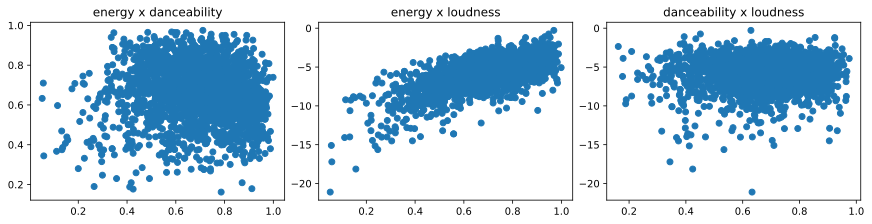

In [17]:
# gráfico feio e complicado
fig, ax = plt.subplots(1,3,figsize=(12,3))

ax[0].scatter(spotify['energy'], spotify['danceability'])
ax[0].set_title("energy x danceability")

ax[1].scatter(spotify['energy'], spotify['loudness'])
ax[1].set_title("energy x loudness")

ax[2].scatter(spotify['danceability'], spotify['loudness'])
ax[2].set_title("danceability x loudness")

([<matplotlib.axis.YTick at 0x2ab4bb77160>,
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

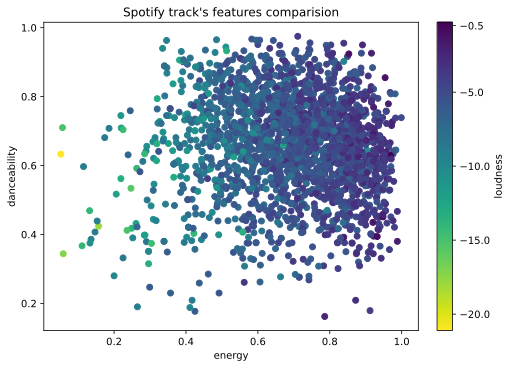

In [18]:
plt.figure(figsize=(7,5))

plt.scatter(spotify['energy'], spotify['danceability'], c=spotify['loudness'], 
            cmap='viridis_r',
            linewidths=1)

plt.colorbar(ticks=[-0.5,-5,-10,-15,-20]).set_label("loudness")

plt.title("Spotify track's features comparision")
plt.xlabel("energy")
plt.ylabel("danceability")
plt.yticks([0.2,0.4,0.6,0.8,1])

# forma implícita

Text(0, 0.5, 'danceability')

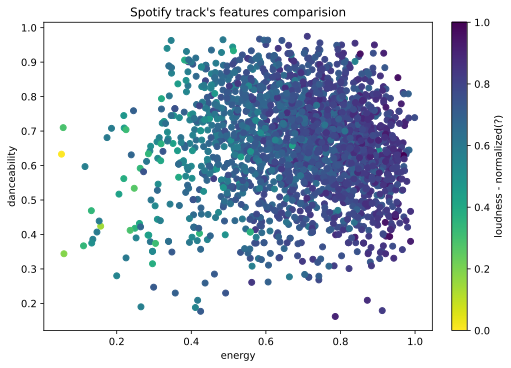

In [19]:
# forma explícita

fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(spotify['energy'], spotify['danceability'], c=spotify['loudness'], 
            cmap='viridis_r',
            linewidths=1)

# mais difícil de fazer o colorbar
cmap = plt.get_cmap('viridis_r')
sm = plt.cm.ScalarMappable(cmap=cmap)
fig.colorbar(sm).set_label("loudness - normalized(?)")

ax.set_title("Spotify track's features comparision")
ax.set_xlabel("energy")
ax.set_ylabel("danceability")

Sobre o mapa de cores (colormap), veja mais em: https://matplotlib.org/stable/tutorials/colors/colormaps.html

### 4.2) Histograma - hist

É um gráfico que analisa a frequência em intervalos de valores contínuos

In [20]:
nba = pd.read_csv(r"C:\VS\USP\fea_dev\post\aula_visu_dados\all_seasons.csv"); nba

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


Como se dá a distribuição de características físicas dos jogadores da NBA? 

Podemos fazer alguns histogramas pra analizar:

Text(0.5, 1.0, 'player_weight')

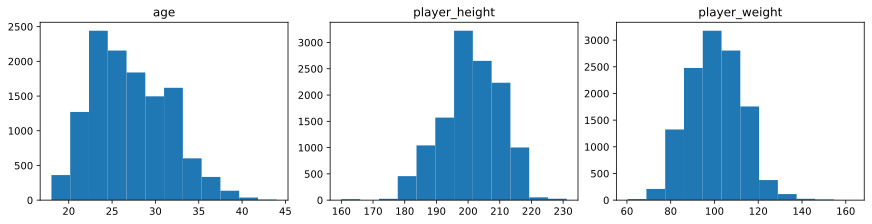

In [21]:
# gráfico feio
bins = 12
fig, ax = plt.subplots(1,3,figsize=(12,3))

ax[0].hist(nba['age'], bins=bins)
ax[0].set_title('age')

ax[1].hist(nba['player_height'], bins=bins)
ax[1].set_title('player_height')

ax[2].hist(nba['player_weight'], bins=bins)
ax[2].set_title('player_weight')

Text(0.5, 1.0, 'Player Weight')

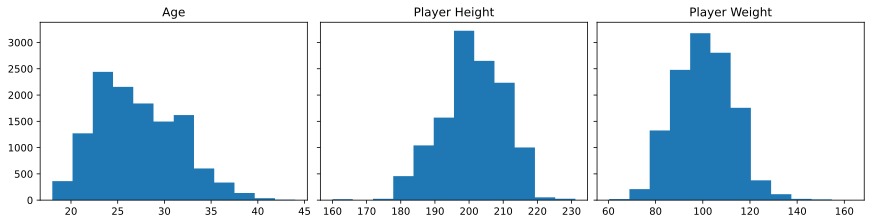

In [22]:
# gráfico razoável
bins = 12
fig, ax = plt.subplots(1,3,figsize=(12,3), sharey=True)

ax[0].hist(nba['age'], bins=bins, histtype='stepfilled')
ax[0].set_title('Age')
ax[1].hist(nba['player_height'], bins=bins, histtype='stepfilled')
ax[1].set_title('Player Height')
ax[2].hist(nba['player_weight'], bins=bins, histtype='stepfilled')
ax[2].set_title('Player Weight')

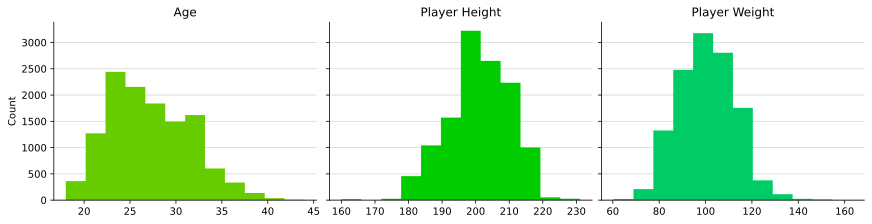

In [23]:
# gráfico ótimo

bins = 12

fig, ax = plt.subplots(1,3,figsize=(12,3), sharey=True)
ax[0].set_ylabel('Count')

ax[0].hist(nba['age'], bins=bins, histtype='stepfilled', color='#66cc00')
ax[0].set_title('Age')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].grid(alpha=0.5, axis='y')
ax[0].set_axisbelow(True)

ax[1].hist(nba['player_height'], bins=bins, histtype='stepfilled', color='#00cc00')
ax[1].set_title('Player Height')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].grid(alpha=0.5, axis='y')
ax[1].set_axisbelow(True)

ax[2].hist(nba['player_weight'], bins=bins, histtype='stepfilled', color='#00cc66')
ax[2].set_title('Player Weight')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].grid(alpha=0.5, axis='y')
ax[2].set_axisbelow(True)

Site para pegar as cores: https://www.rapidtables.com/web/color/RGB_Color.html

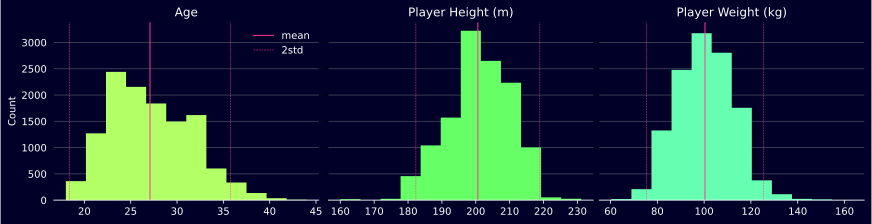

In [24]:
# gráfico master
bins = 12

fig, ax = plt.subplots(1,3,figsize=(12,3), sharey=True, facecolor='#000028', edgecolor='white')
ax[0].set_ylabel('Count').set_color('white')

ax[0].hist(nba['age'], bins=bins, histtype='stepfilled', color='#b2ff66')
ax[0].set_title('Age').set_color('white')
ax[0].set_facecolor('#000028')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].grid(alpha=0.4, axis='y')
ax[0].set_axisbelow(True)
ax[0].tick_params(left=False)

ax[1].hist(nba['player_height'], bins=bins, histtype='stepfilled', color='#66ff66')
ax[1].set_title('Player Height (m)').set_color('white')
ax[1].set_facecolor('#000028')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].tick_params(axis='x', colors='white')
ax[1].grid(alpha=0.4, axis='y')
ax[1].set_axisbelow(True)

ax[2].hist(nba['player_weight'], bins=bins, histtype='stepfilled', color='#66ffb2')
ax[2].set_title('Player Weight (kg)').set_color('white')
ax[2].set_facecolor('#000028')
ax[2].spines['bottom'].set_color('white')
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].tick_params(axis='x', colors='white')
ax[2].grid(alpha=0.4, axis='y')
ax[2].set_axisbelow(True)

ax[0].axvline(np.mean(nba['age']), color='#ff3399', linestyle='-', linewidth=1, label='mean')
ax[0].axvline(np.mean(nba['age'])+2*np.std(nba['age']), color='#ff3399', linestyle='--', linewidth=0.5, label='2std')
ax[0].axvline(np.mean(nba['age'])-2*np.std(nba['age']), color='#ff3399', linestyle='--', linewidth=0.5)
ax[0].legend(frameon=False, labelcolor='white')
ax[1].axvline(np.mean(nba['player_height']), color='#ff3399', linestyle='-', linewidth=1)
ax[1].axvline(np.mean(nba['player_height'])+2*np.std(nba['player_height']), color='#ff3399', linestyle='--', linewidth=0.5)
ax[1].axvline(np.mean(nba['player_height'])-2*np.std(nba['player_height']), color='#ff3399', linestyle='--', linewidth=0.5)
ax[2].axvline(np.mean(nba['player_weight']), color='#ff3399', linestyle='-', linewidth=1)
ax[2].axvline(np.mean(nba['player_weight'])+2*np.std(nba['player_weight']), color='#ff3399', linestyle='--', linewidth=0.5)
ax[2].axvline(np.mean(nba['player_weight'])-2*np.std(nba['player_weight']), color='#ff3399', linestyle='--', linewidth=0.5)

## 5) Outras bibliotecas

### 5.1) Seaborn

Por mais que seja possível fazer gráficos bonitinhos no matplotlib, às vezes requer muito trabalho, especialmente quando há funcionalidades estatísticas  mais complexas.     

A biblioteca seaborn entra aí! É possível fazer gráficos mais apresentáveis e mais complexos com relativamente menos trabalho. 

A vantagem é que o seaborn utiliza também o matplotlib no fundo, mantendo a intuição e com mais funcionalidades; ainda, ela tem maior integração com pandas.

Veja mais em: https://seaborn.pydata.org/index.html

In [25]:
import seaborn as sns

Em geral, a fórmula dos plots do seaborn seguem o seguinte formato:

_sns.plotplot(dataframe, x, y, hue, ...)_

### 5.1.1) Boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [26]:
titanic = df = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Qual a distribuição de idade dos passageiros de acordo com a classe? E gênero?

<AxesSubplot: xlabel='fare', ylabel='class'>

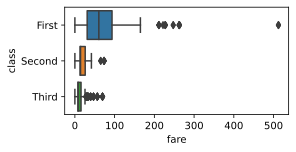

In [27]:
sns.boxplot(data=titanic, x='fare', y='class')

Perceba que a imagem está pequena. Ou seja, o tamanho da imagem do seaborn segue o padrão determinado pelo matplotlib no início da aula! Então, se quisermos mudar o tamanho, temos de usar o próprio mpl.

<AxesSubplot: xlabel='age', ylabel='class'>

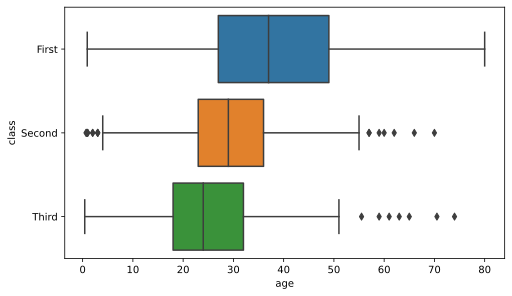

In [28]:
plt.figure(figsize=(7,4))
sns.boxplot(data=titanic, 
            x='age', y='class')

<AxesSubplot: xlabel='age', ylabel='class'>

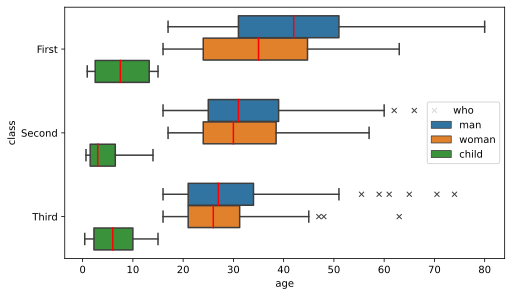

In [29]:
plt.figure(figsize=(7,4))
sns.boxplot(data=titanic, 
            x='age', y='class', hue='who',
            flierprops={"marker": "x"}, medianprops={"color": "red"})

### 5.2) Plotly

Mais diferente ainda de matplotlib e seaborn, o intuito dessa biblioteca é a interatividade! Além disso, ela tem facilidades para implementação em aplicativos. Por outro lado, ela não tem a mesma amplitude de personalização.

Ela não tem a mesma integração com o matplotlib, mas a forma de fazer os plots é muito similar ao Seaborn.

https://plotly.com/python/


In [30]:
import plotly.express as px
import plotly.graph_objects as go

### 5.2.1) Gráfico de pizza - pie chart

Qual o preço total de passagens pagos por cada classe dos passageiros do titanic?

In [49]:
fig = px.pie(titanic, values='fare', names='class',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#color_discrete_sequence=px.colors.sequential.RdBu

### 5.2.2) Gráfico de vela - candlestick (gráfico de ações)

Esse gráfico agrega os valores de abertura, o máximo, mínimo e de fechamento

In [32]:
ibov

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-01,57836.0,63805.0,57836.0,63072.0,63072.0,52505600
2012-02-01,63085.0,66662.0,63085.0,65812.0,65812.0,52916000
2012-03-01,65812.0,68970.0,64096.0,64511.0,64511.0,55588800
2012-04-01,64515.0,65593.0,60897.0,61820.0,61820.0,54261600
2012-05-01,61820.0,62783.0,53028.0,54490.0,54490.0,77092600
...,...,...,...,...,...,...
2022-08-01,103165.0,114375.0,101694.0,109523.0,109523.0,297125100
2022-09-01,109524.0,114392.0,106244.0,110037.0,110037.0,288740800
2022-10-01,110048.0,120752.0,110048.0,116037.0,116037.0,301259400


In [33]:
fig = go.Figure(data=[go.Candlestick(
    x=b3.index,
    open=b3['Open'], high=b3['High'],
    low=b3['Low'], close=b3['Close'],
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.show()